<a href="https://colab.research.google.com/github/SANTHIYA-7/SANTHIYA-7/blob/main/WINE_QUALITY_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WINE QUALITY PREDICTION USING SUPPORT VECTOR MACHINE**

---



## **OBJECTIVE**
The objectives of this project are as follows

1.To experiment with different classification methods to see which yields the highest accuracy

2.To determine which features are the most indicative of a good quality wine


## **DATA SOURCE**
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
12 - quality (score between 0 and 10)

## **IMPORT LIBRARY**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **IMPORT DATA**

In [7]:
df=pd.read_csv(r'https://github.com/YBIFoundation/Dataset/raw/main/WhiteWineQuality.csv', sep=';')

## **DESCRIBE DATA**

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## **DATA VISUALIZATION**

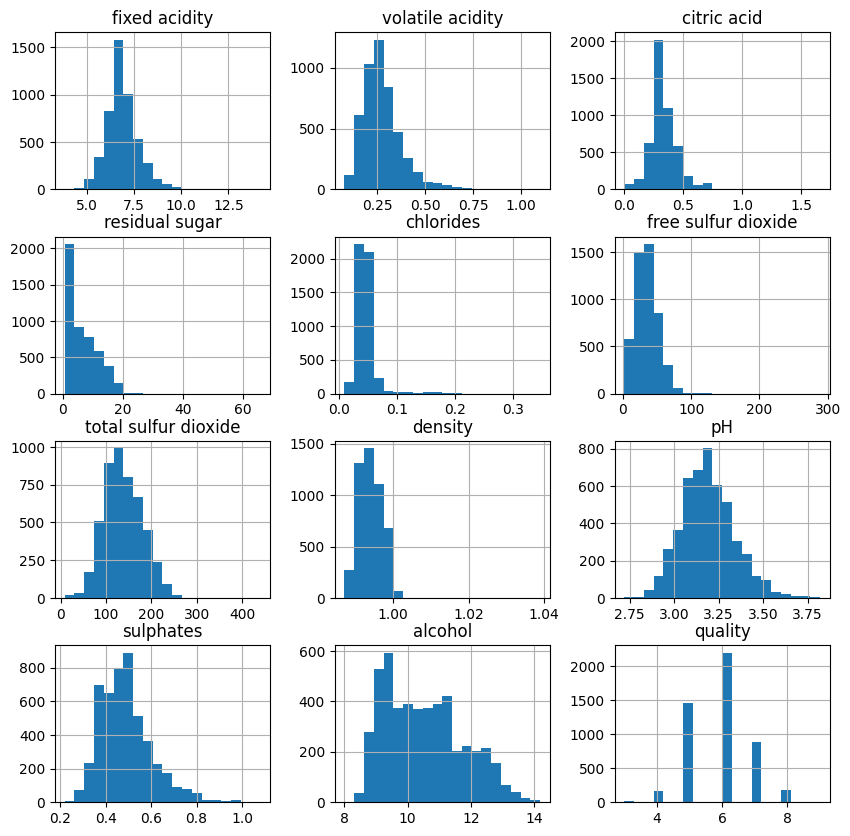

In [35]:
df.hist(bins=20, figsize=(10, 10))
plt.show()


## **DEFINE TARGET VARIABLE (X) AND FEATURE VARIABLE (Y)**

In [13]:
y=df['quality']

In [14]:
y.shape

(4898,)

In [15]:
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [17]:
x= df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [18]:
x.shape

(4898, 11)

In [19]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


## **TRAIN TEST SPLIT**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, stratify= y, random_state=2529)

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

## **MODELING**

In [23]:
from sklearn.svm import SVC

In [24]:
svc=SVC()

In [25]:
svc.fit(x_train, y_train)

SVC()

## **MODEL EVALUATION**

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
print(confusion_matrix(y_test,y_pred))

[[  0   0   1   5   0   0   0]
 [  0   0   0  49   0   0   0]
 [  0   0  10 427   0   0   0]
 [  0   0  11 649   0   0   0]
 [  0   0   0 264   0   0   0]
 [  0   0   0  53   0   0   0]
 [  0   0   0   1   0   0   0]]


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        49
           5       0.45      0.02      0.04       437
           6       0.45      0.98      0.62       660
           7       0.00      0.00      0.00       264
           8       0.00      0.00      0.00        53
           9       0.00      0.00      0.00         1

    accuracy                           0.45      1470
   macro avg       0.13      0.14      0.09      1470
weighted avg       0.34      0.45      0.29      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **PREDICTION**

In [30]:
y_pred= svc.predict(x_test)

In [31]:
y_pred.shape

(1470,)

In [38]:
y_pred

array([6, 6, 6, ..., 6, 6, 6])

## **EXPLANATION**
Support Vector Machines (SVM) is a machine learning algorithm commonly used for classification and regression tasks. It can also be applied to predict the quality of white wine based on certain input features. Here's an explanation of how SVM can be used for white wine quality prediction:

1. Dataset Preparation: To train an SVM model for white wine quality prediction, you need a labeled dataset that includes samples of white wines along with their corresponding quality ratings. The dataset should also include various features (or attributes) of the wines, such as acidity, sugar content, pH level, alcohol percentage, etc. These features act as the input variables for the SVM model.

2. Feature Selection and Preprocessing: Before training the SVM model, it's important to perform feature selection and preprocessing steps. Feature selection helps identify the most relevant features that contribute to the quality of white wine. Preprocessing involves scaling or normalizing the feature values to ensure they are on a similar scale, which helps SVM perform better.

3. Training the SVM Model: Once the dataset is prepared, it is divided into two subsets: a training set and a test set. The training set is used to train the SVM model, while the test set is used to evaluate its performance. The SVM algorithm aims to find an optimal hyperplane that separates the white wines into different quality categories.

4. Model Evaluation: After training the SVM model, it is evaluated using the test set to measure its accuracy and generalization performance. Common evaluation metrics for classification tasks include accuracy, precision, recall, F1 score, and area under the receiver operating characteristic curve (AUC-ROC).

5. Prediction: Once the SVM model is trained and evaluated, it can be used to predict the quality of new, unseen white wines based on their features. The model takes the feature values of a white wine as input and outputs a quality prediction, which is typically a class label or a numerical score.

By following these steps, an SVM model can be trained to predict the quality of white wine based on its features. It's worth noting that the success of the prediction depends on the quality and representativeness of the dataset, the choice of appropriate features, and the proper selection and optimization of the SVM model's parameters.

